In [1]:
import sys
from RF_class import RF_model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

model = RF_model()

In [2]:
# hyper_params = {}
# hyper_params['n_estimators'] = [20, 51, 82, 113, 144, 175, 206, 237, 268, 300]
# hyper_params['max_features'] = ['sqrt', 'log2']
# hyper_params['max_depth'] = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# hyper_params['min_samples_split'] = [2, 5, 10]
# hyper_params['min_samples_leaf'] = [1, 2, 4]

hyper_params = {'n_estimators': [int(20), int(51)],
                'max_features': ['sqrt'],
                'max_depth':  [int(10), int(20)],
                'min_samples_split': [int(2), int(5)],
                'min_samples_leaf': [int(1)]}

In [3]:
feat_tr_path = '/users/yhb18174/Recreating_DMTA/datasets/ChEMBL/training_data/desc/rdkit/ChEMBL_rdkit_desc_1.csv.gz'
features = pd.read_csv(feat_tr_path, index_col='ID', compression='gzip')
xtr = features.iloc[:-10]
xte = features.tail(10)


tar_tr_path = '/users/yhb18174/Recreating_DMTA/datasets/ChEMBL/training_data/dock/ChEMBL_docking_df.csv'
targets = pd.read_csv(tar_tr_path, index_col='ID')
dock_scores= targets['affinity_exp']
ytr=pd.DataFrame(dock_scores.iloc[:-10])
yte=pd.DataFrame(dock_scores.tail(10))


In [5]:
rf, params, perf, feats = model.Train_Regressor(search_type='grid',
                    scoring = 'neg_mean_squared_error',
                    n_resamples=2,
                    inner_cv_type='kfold',
                    n_splits=5,
                    test_size=0.3,
                    test=False,
                    hyper_params=hyper_params,
                    features=xtr,
                    targets=ytr)

Performing resample 1 of 2


/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was pa

ValueError: Unable to coerce to Series, length must be 1: given 314

In [4]:
rf, params, perf, feats = model.Train_Regressor_parallel(search_type='grid',
                    scoring = 'neg_mean_squared_error',
                    n_resamples=2,
                    inner_cv_type='kfold',
                    n_splits=5,
                    test_size=0.3,
                    test=False,
                    hyper_params=hyper_params,
                    features=xtr,
                    targets=ytr)

Performing resample 2
Performing resample 1


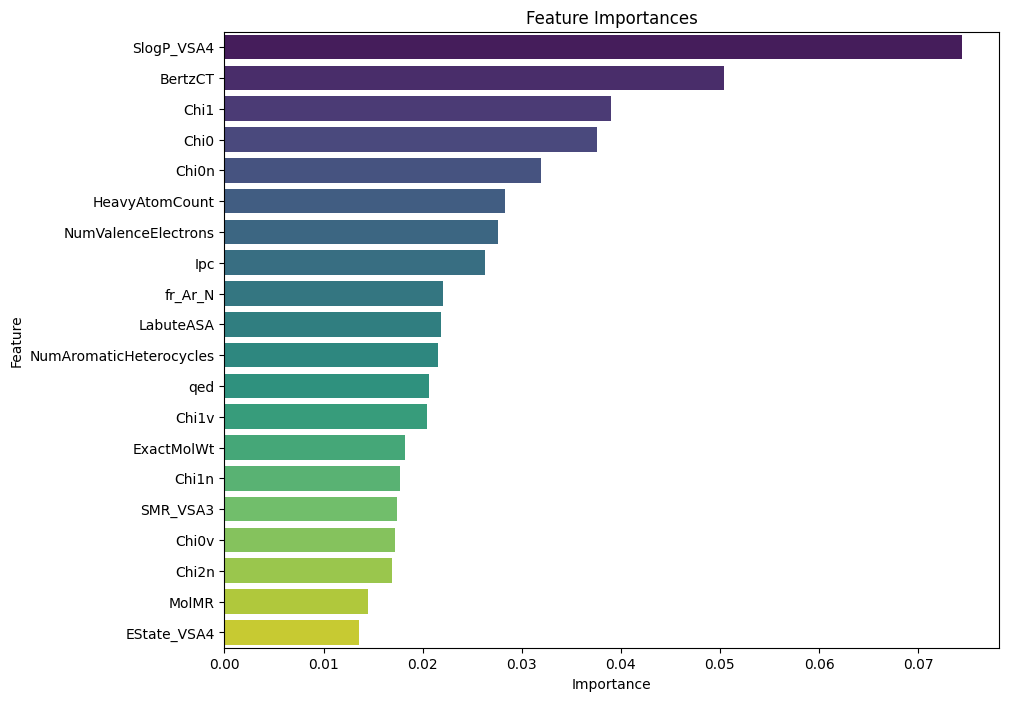

In [10]:
importance = model._plot_feature_importance(feats)

In [5]:
models.Predict_RF(xte, save_preds=False)

/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/users/yhb18174/.conda/en

,affinity_pred,Uncertainty
ID,,
CHEMBL3409982,-7.014902,0.594631
CHEMBL3409984,-7.084510,0.571501
CHEMBL3409991,-6.829542,0.522519
CHEMBL3409990,-6.746471,0.575414
CHEMBL3409987,-7.099412,0.632609
CHEMBL4069308,-7.827059,0.702126
CHEMBL1507539,-7.338775,0.901483
CHEMBL188678,-8.598052,1.106376
CHEMBL278041,-8.337059,1.064348
